In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 한글 폰트 사용하기 위한 코드

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
#확인
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NanumBarun' in f.name]

[('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # ploty

from collections import Counter

In [ ]:
base_path = '/content/drive/MyDrive/이어드림스쿨/Project/Final_project/2021 농산물 예측대회 AI 경진대회/2021 농산물 가격예측 AI 경진대회/프로젝트 data/'

In [ ]:
df = pd.read_parquet(base_path + 'new_selcet_df.parquet_1')
df.head()

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT,mean_price
78,2016-01-09,부산엄궁도매,부산청과,대파,대파(일반),kg,단,.,보통,부산 중구,1.0,100.0,1610.0,100.0,161000.0,1610.0
79,2016-01-09,부산엄궁도매,부산청과,대파,대파(일반),kg,단,.,보통,부산 중구,1.0,100.0,1610.0,100.0,161000.0,1610.0
80,2016-01-09,부산엄궁도매,부산청과,대파,대파(일반),kg,단,.,보통,부산 중구,1.0,100.0,1610.0,100.0,161000.0,1610.0
81,2016-01-09,부산엄궁도매,부산청과,대파,대파(일반),kg,단,.,보통,부산 중구,1.0,100.0,1610.0,100.0,161000.0,1610.0
82,2016-01-09,부산엄궁도매,부산청과,대파,대파(일반),kg,단,.,보통,부산 중구,1.0,100.0,1610.0,100.0,161000.0,1610.0


In [ ]:
df.SAN_NM

78            부산 중구
79            부산 중구
80            부산 중구
81            부산 중구
82            부산 중구
             ...   
3453589    충청남도 당진군
3453590    충청남도 당진군
3453591    충청남도 당진군
3453597    경상북도 영주시
3453744       광주 북구
Name: SAN_NM, Length: 17678162, dtype: category
Categories (481, object): ['.', '강원 강릉시', '강원 고성군', '강원 동해시', ..., '칠레', '태국', '터키', '필리핀']

## 산지관련 columns 확인

- 대파결측치 : 3.22
- 배추결측치 : 3.32
- 무결측치 : 3.94
- 양파결측치 : 2.68
- 사과결측치 : 2.31
- 마늘결측치 : 2.83
- 건고추결측치 : 2.98

In [ ]:
df['CMP_NM'].unique()

['부산청과', '부평농산', '인터넷청과', '덕풍청과', '구리청과', ..., '서부청과', '강서청과', '대전청과', '안양농산물(주)', '무배추조합']
Length: 83
Categories (86, object): ['강릉농산물', '강북수산', '강서청과', '경기청과', ..., '항도청과', '해랑수산', '호남청과', '효성청과']

In [ ]:
print(df.shape)
print(df[df.SAN_NM == '.'].shape)
print('비율 :', df[df.SAN_NM == '.'].shape[0] / df.shape[0]) 

# 약 0.02%

(17678162, 16)
(482987, 16)
비율 : 0.02732110951353427


In [ ]:
df[df.SAN_NM == '.'].head()

In [ ]:
a = df[df.SAN_NM == '.'].PUM_NM.value_counts()[:7]
fig = px.pie(a, values = a.values, names = a.index)
fig.update_layout(title_text=f'산지 결측치 데이터 중 품목별 거래횟수 (total)', title_x=0.5)
fig.update_yaxes(tickformat=',') 
fig.show()

In [ ]:
a = df[df.SAN_NM == '.']. groupby('PUM_NM')['TOT_QTY'].sum().sort_values(ascending = False)[:7]
fig = px.line(a, x = a.index, y = a.values, title = '산지 결측치 데이터 중 품목별 총거래량 (total)')
fig.update_yaxes(tickformat=',')
fig.show()

법인이나 도매시장으로 산지를 아는 것은 불가능..

- 전체 데이터의 0.02%
- 전체 데이터의 품목별 거래횟수, 총거래량 분포도와 비슷 (산지 결측치가 특정 품목에 편향된 데이터가 아님) 

In [ ]:
san_df = df[df.SAN_NM == '.']
print(san_df.CMP_NM.unique())
print(san_df.CMP_NM.value_counts()[:57])

## 전처리 코드 함수화

In [ ]:
df[df.SAN_NM == '.'].index

Int64Index([   2951,    3063,    3064,   16987,   28844,   28845,   28846,
              28936,   28937,   28966,
            ...
            3414239, 3414240, 3414241, 3414242, 3414243, 3414333, 3414367,
            3414368, 3414499, 3414501],
           dtype='int64', length=482987)

In [ ]:
# 산지 결측치 데이터 drop
def my_pre(df) :
    # category 421항목 -> 7항목으로 변경
    df['PUM_NM'] = df.PUM_NM.astype('object')
    df['PUM_NM'] = df.PUM_NM.astype('category')
    print(df.PUM_NM.unique()) # 확인

    df['count'] = 1
    df.index = df.SALEDATE
    df['month'] = df.index.month
    df["Day"] = df.index.day
    df = df.reset_index(drop=True)

    # 산지 결측치 (,)값 drop
    print(df.shape)
    df = df.drop(df[df.SAN_NM == '.'].index) # 약 50만건 데이터 삭제
    print(df.shape)

    df = df.reset_index(drop=True)

    return df


# 전체 데이터
def my_pre2(df) :
    # category 421항목 -> 7항목으로 변경
    df['PUM_NM'] = df.PUM_NM.astype('object')
    df['PUM_NM'] = df.PUM_NM.astype('category')
    print(df.PUM_NM.unique()) # 확인

    df['count'] = 1
    df.index = df.SALEDATE
    df['month'] = df.index.month
    df["Day"] = df.index.day
    df = df.reset_index(drop=True)

    return df

In [ ]:
df1 = df.copy()

In [ ]:
df1 = my_pre2(df1)

['대파', '배추', '무', '양파', '사과', '마늘', '건고추']
Categories (7, object): ['건고추', '대파', '마늘', '무', '배추', '사과', '양파']


In [ ]:
print(df1.shape)
df1.head()

(17678162, 19)


,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT,mean_price,count,month,Day
0,2016-01-09,부산엄궁도매,부산청과,대파,대파(일반),kg,단,.,보통,부산 중구,1.0,100.0,1610.0,100.0,161000.0,1610.0,1,1,9
1,2016-01-09,부산엄궁도매,부산청과,대파,대파(일반),kg,단,.,보통,부산 중구,1.0,100.0,1610.0,100.0,161000.0,1610.0,1,1,9
2,2016-01-09,부산엄궁도매,부산청과,대파,대파(일반),kg,단,.,보통,부산 중구,1.0,100.0,1610.0,100.0,161000.0,1610.0,1,1,9
3,2016-01-09,부산엄궁도매,부산청과,대파,대파(일반),kg,단,.,보통,부산 중구,1.0,100.0,1610.0,100.0,161000.0,1610.0,1,1,9
4,2016-01-09,부산엄궁도매,부산청과,대파,대파(일반),kg,단,.,보통,부산 중구,1.0,100.0,1610.0,100.0,161000.0,1610.0,1,1,9


## 품종별 EDA

### 배추

In [ ]:
df2 = df1[df1.PUM_NM == '배추'].reset_index(drop=True)

In [ ]:
pd.options.display.float_format = '{:.1f}'.format
df2.head()

#### 배추 종류별 가격대 확인 (기초통계량)

In [ ]:
print('배추 종류:', df2.KIND_NM.nunique())
df2.KIND_NM.value_counts()[:16]

배추 종류: 16


쌈배추         631230
기타배추        473676
봄배추         222337
월동배추        186733
김장(가을)배추    109174
고냉지배추        77701
여름배추         69627
배추           52145
저장배추         40472
절임배추         30393
배추뿌리         14315
우거지          12047
생채용 배추         926
배추(수입)         548
우거지(수입)         34
배양채              2
Name: KIND_NM, dtype: int64

In [ ]:
for i in cab_lst :
    print(f'{i} 기초통계량 확인')
    display(df2[df2.KIND_NM == i]['mean_price'].describe())
    print('')

쌈배추 기초통계량 확인


count    631230.0
mean       2260.7
std        5664.5
min          20.0
25%         875.0
50%        1537.5
75%        2737.5
max     4000000.0
Name: mean_price, dtype: float64


기타배추 기초통계량 확인


count     473676.0
mean        2662.6
std        37261.0
min            0.1
25%          409.9
50%          812.5
75%         1960.0
max     15254427.0
Name: mean_price, dtype: float64


우거지 기초통계량 확인


count   12047.0
mean     1934.6
std      2739.9
min        15.0
25%       486.7
50%      1100.0
75%      2000.0
max     32000.0
Name: mean_price, dtype: float64


절임배추 기초통계량 확인


count   30393.0
mean     1254.6
std       266.3
min        50.0
25%      1125.0
50%      1250.0
75%      1400.0
max     12500.0
Name: mean_price, dtype: float64


봄배추 기초통계량 확인


count   222337.0
mean      1151.3
std       2081.1
min         10.0
25%        345.0
50%        615.0
75%       1100.0
max      52400.0
Name: mean_price, dtype: float64


월동배추 기초통계량 확인


count   186733.0
mean       572.4
std        449.2
min          0.8
25%        280.0
50%        470.0
75%        737.5
max       5990.0
Name: mean_price, dtype: float64


배추 기초통계량 확인


count   52145.0
mean      645.2
std       489.6
min         8.3
25%       300.0
50%       500.0
75%       860.0
max      6850.0
Name: mean_price, dtype: float64


김장(가을)배추 기초통계량 확인


count   109174.0
mean       463.6
std       1116.3
min          8.3
25%        260.0
50%        400.0
75%        595.0
max     350000.0
Name: mean_price, dtype: float64


저장배추 기초통계량 확인


count   40472.0
mean      492.2
std       327.2
min         8.3
25%       250.0
50%       416.7
75%       650.0
max      2683.3
Name: mean_price, dtype: float64


배추뿌리 기초통계량 확인


count   14315.0
mean     2218.0
std      1281.0
min        62.5
25%      1331.2
50%      1997.5
75%      2928.8
max     18050.0
Name: mean_price, dtype: float64


여름배추 기초통계량 확인


count    69627.0
mean       942.7
std        990.6
min          3.5
25%        430.0
50%        727.3
75%       1210.0
max     159500.0
Name: mean_price, dtype: float64


생채용 배추 기초통계량 확인


count     926.0
mean     1159.9
std      1510.4
min        50.0
25%       400.0
50%       500.0
75%      1100.0
max     12958.0
Name: mean_price, dtype: float64


고냉지배추 기초통계량 확인


count   77701.0
mean      891.9
std       633.6
min        10.0
25%       470.0
50%       770.0
75%      1200.0
max     29000.0
Name: mean_price, dtype: float64


우거지(수입) 기초통계량 확인


count     34.0
mean    2180.9
std     1481.3
min      900.0
25%     1000.0
50%     2000.0
75%     2500.0
max     5000.0
Name: mean_price, dtype: float64


배양채 기초통계량 확인


count      2.0
mean    1250.0
std        0.0
min     1250.0
25%     1250.0
50%     1250.0
75%     1250.0
max     1250.0
Name: mean_price, dtype: float64


배추(수입) 기초통계량 확인


count    548.0
mean    1024.9
std      655.4
min      160.0
25%      640.0
50%      900.0
75%     1262.5
max     9000.0
Name: mean_price, dtype: float64

- 배추 품종들의 가격 분포는 75%까지 1~2000원대로 비슷함
- 따라서 배추 품종들 가격대를 나눠서 진행할 필요는 없어보임

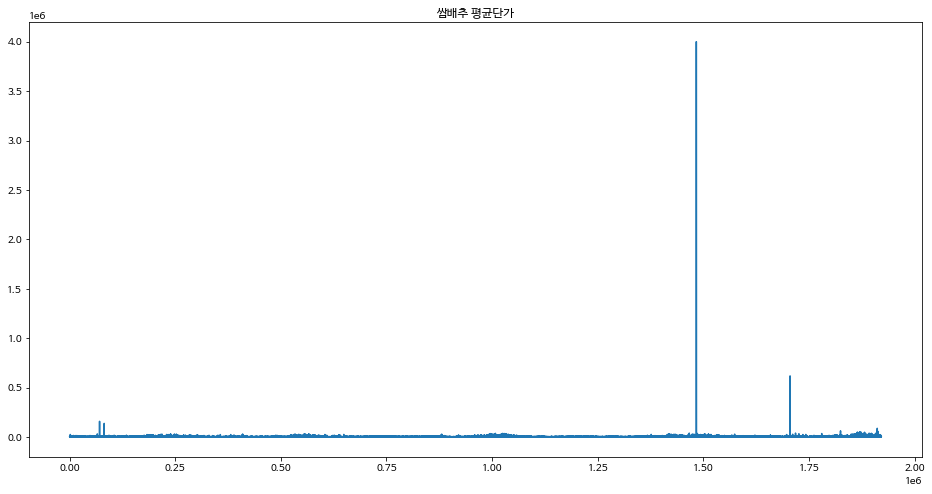

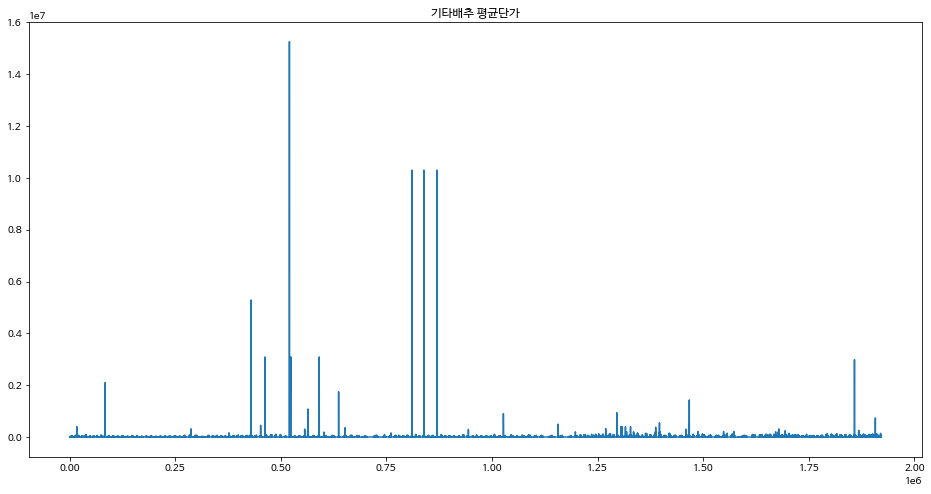

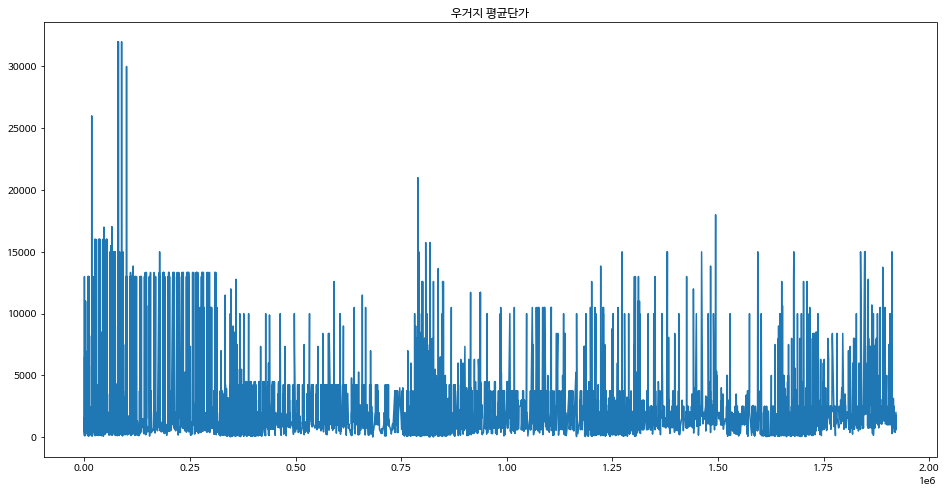

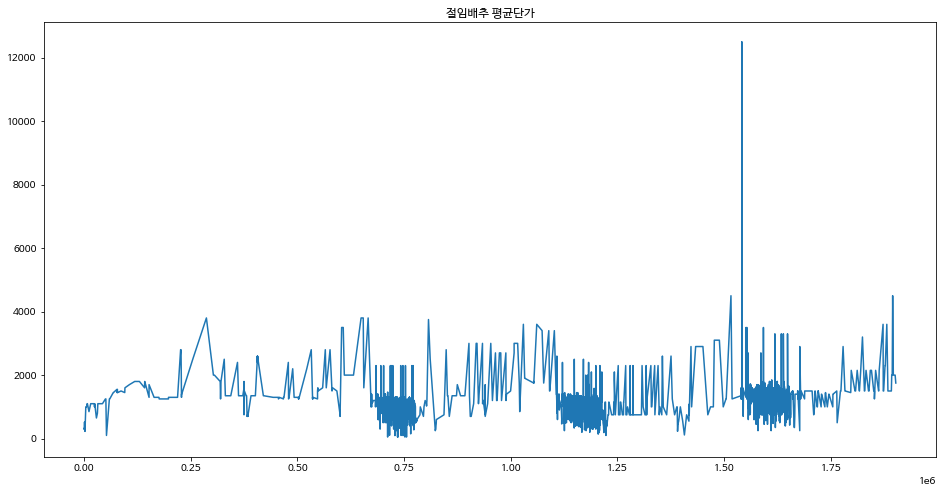

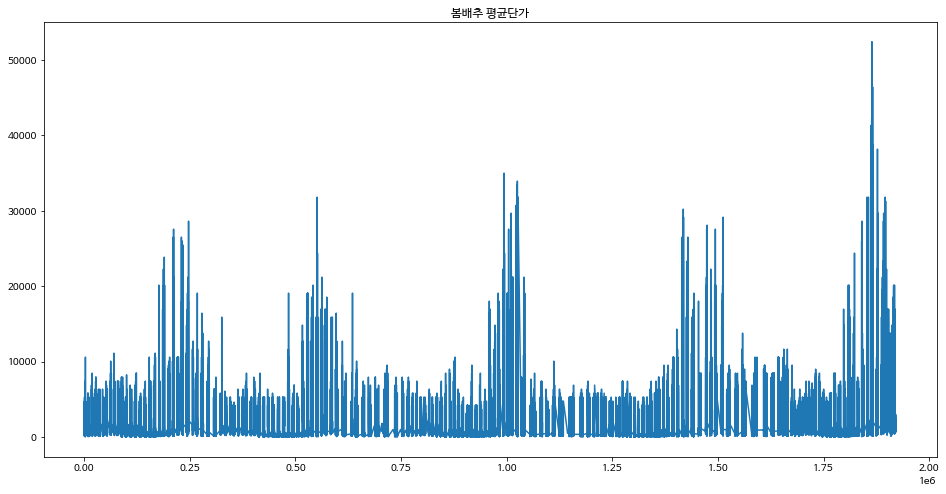

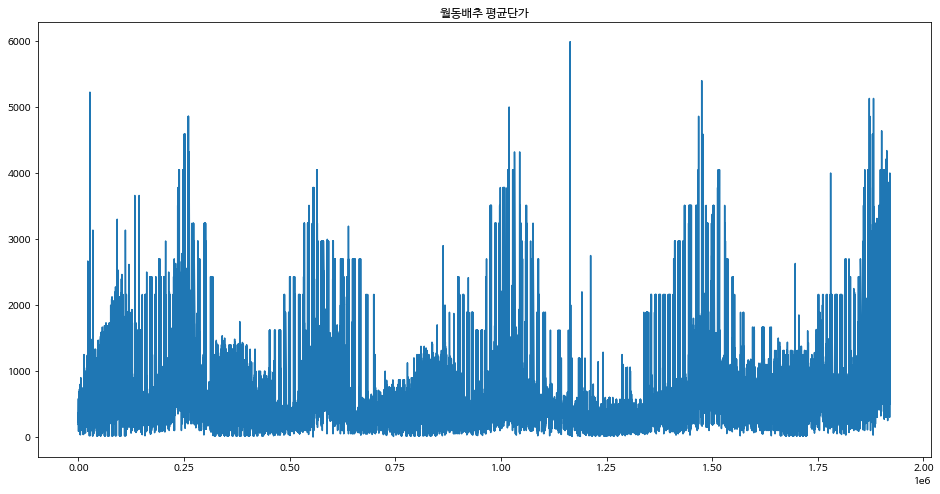

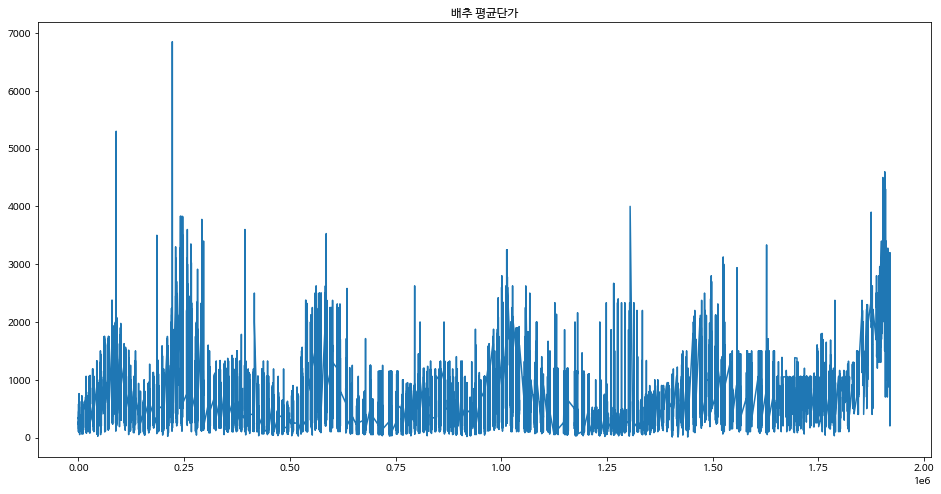

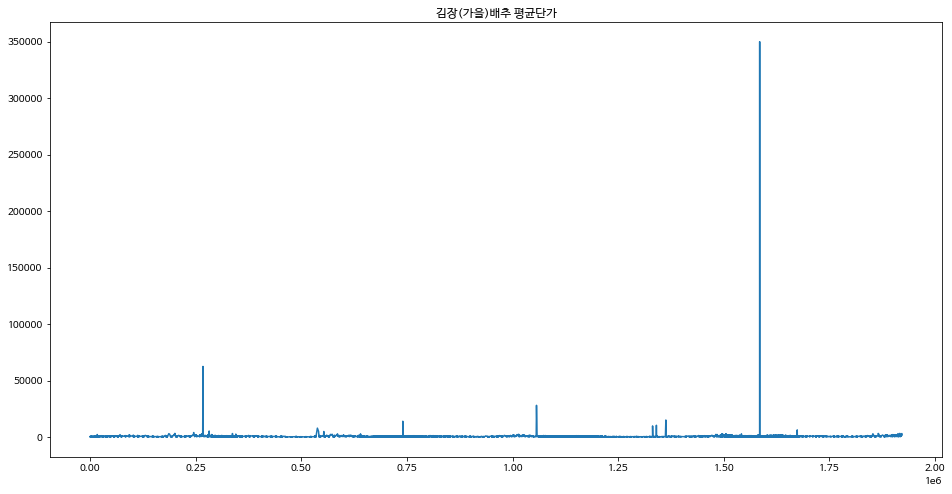

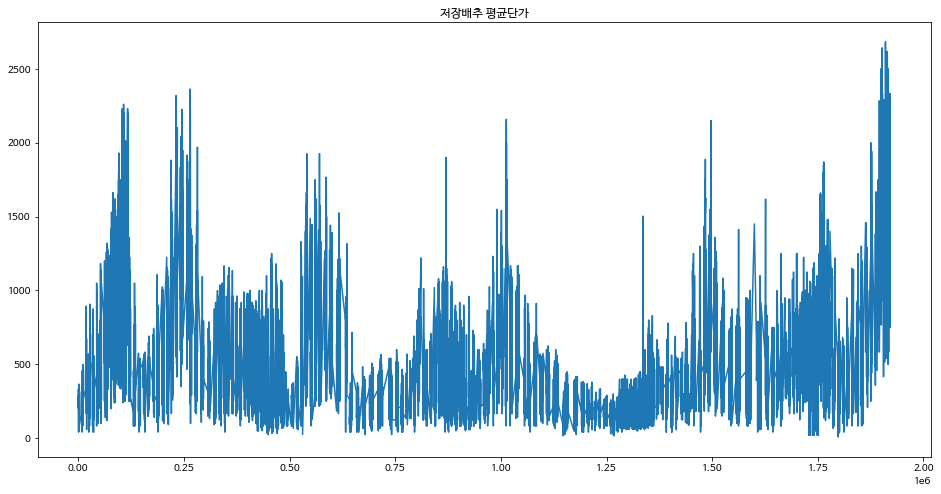

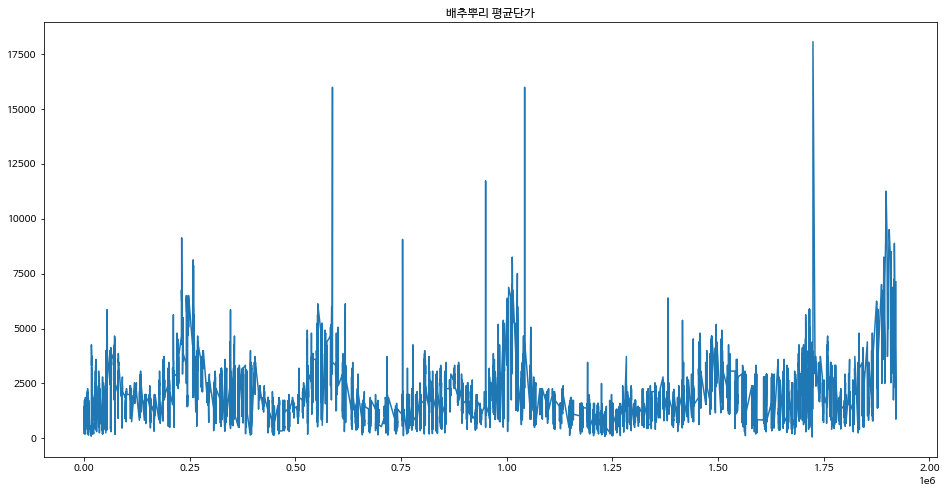

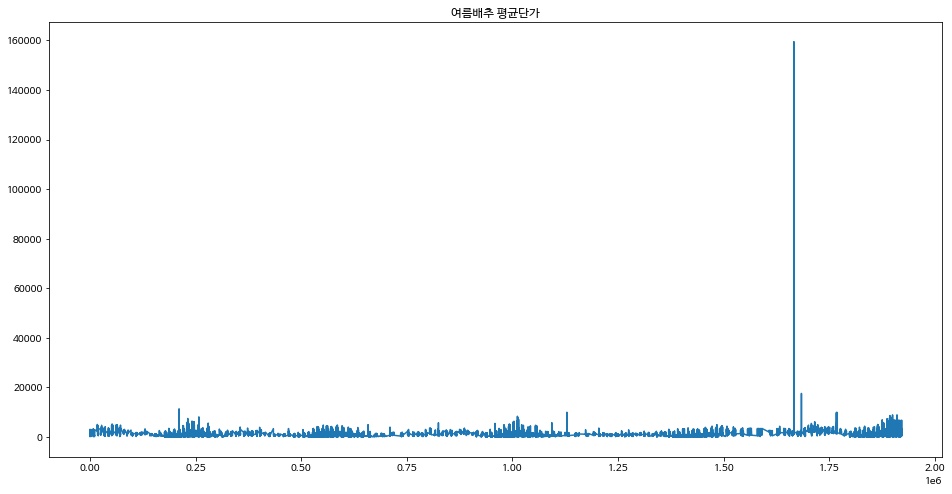

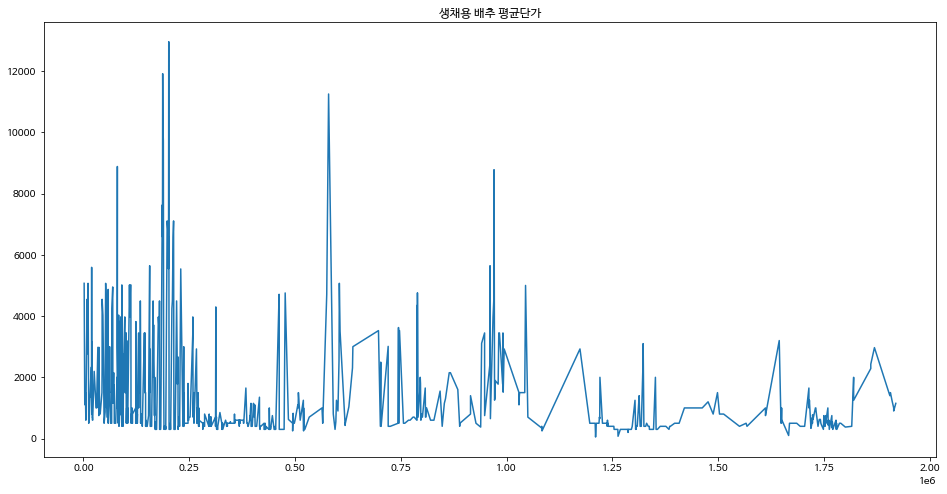

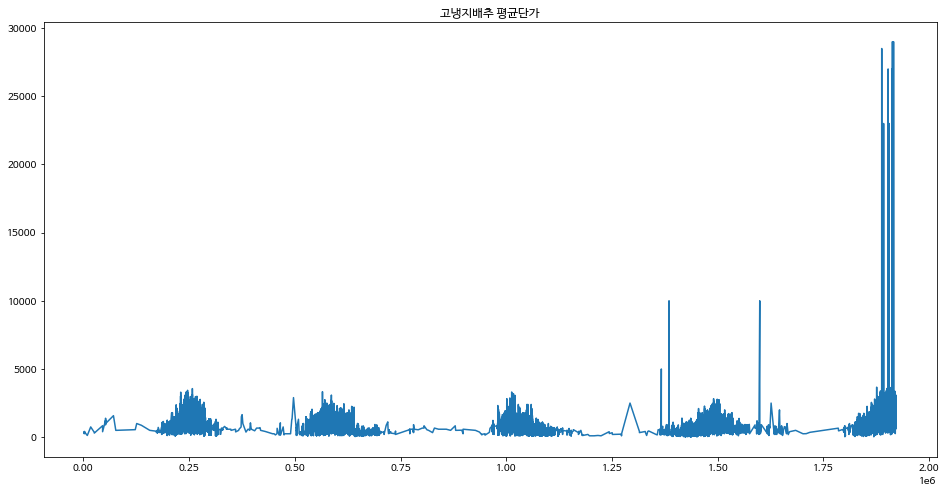

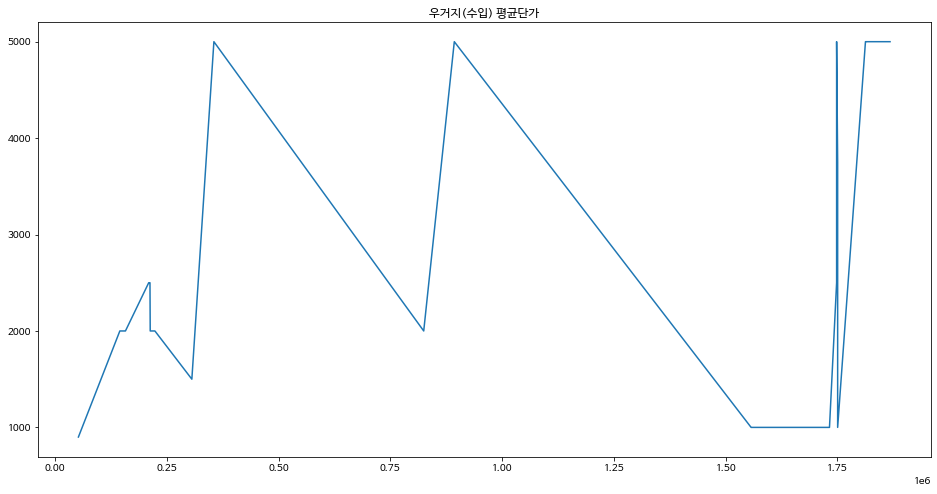

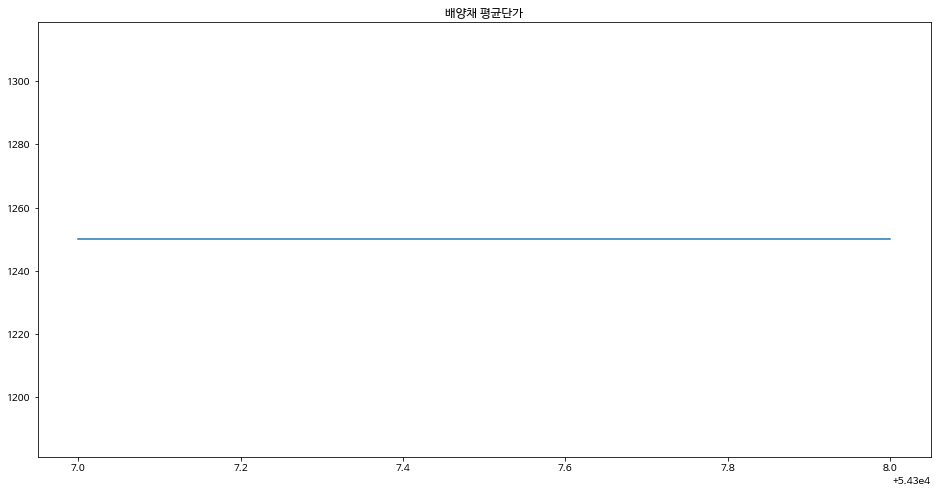

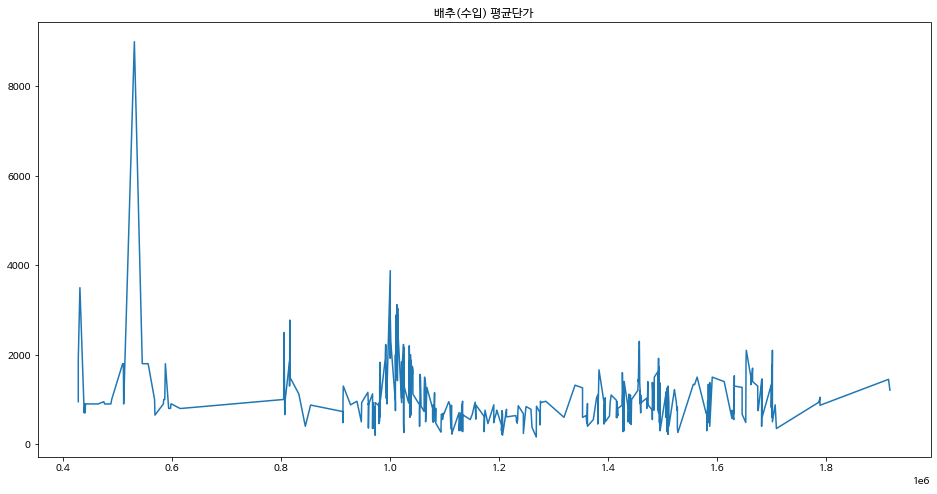

In [ ]:
pd.options.display.float_format = '{:.1f}'.format
cab_lst = df2.KIND_NM.unique()

for i in cab_lst :
    df2[df2.KIND_NM == i]['mean_price'].plot(figsize=(16,8), title = f'{i} 평균단가')
    plt.show()

#### 배추 이상치 제거

In [ ]:
df3 = df2[df2.mean_price <= 30000]
df3.head(2)

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT,mean_price,count,month,Day
0,2016-01-09,부산엄궁도매,부산청과,배추,쌈배추,kg,상자,.,보통,광주 북구,10.0,25.0,6110.0,250.0,152750.0,611.0,1,1,9
1,2016-01-09,부산엄궁도매,부산청과,배추,쌈배추,kg,상자,.,보통,광주 북구,10.0,25.0,6200.0,250.0,155000.0,620.0,1,1,9


In [ ]:
df3.KIND_NM.value_counts()[:16] # 우거지(수입), 배양채 제외

쌈배추         631022
기타배추        471025
봄배추         222256
월동배추        186733
김장(가을)배추    109172
고냉지배추        77701
여름배추         69626
배추           52145
저장배추         40472
절임배추         30393
배추뿌리         14315
우거지          12043
생채용 배추         926
배추(수입)         548
우거지(수입)         34
배양채              2
Name: KIND_NM, dtype: int64

In [ ]:
cab_lst2 = df3.KIND_NM.value_counts()[:14].index

In [ ]:
# 이상치 제거 후 품종 일별 평균단가

cab_lst2 = df3.KIND_NM.value_counts()[:14].index

for pum in cab_lst2 : 
    a = df3[df3.KIND_NM == pum].groupby('SALEDATE')['mean_price'].mean()
    fig = px.line(a, x = a.index, y = a.values, title = f'{pum} 일별 평균단가')
    fig.update_yaxes(tickformat=',')
    fig.show()

In [ ]:
a = df3.groupby('SAN_NM')['TOT_QTY'].sum().sort_values(ascending=False)[:10]

fig = px.pie(a, names = a.index, values = a.values)
fig.update_layout(title_text='배추 총거래량 산지 top10', title_x=0.5) 
fig.update_yaxes(tickformat=',') 
fig.show()

### 무

In [ ]:
df4 = df1[df1.PUM_NM == '무'].reset_index(drop=True)
df4.head(2)

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT,mean_price,count,month,Day
0,2016-01-09,부산엄궁도매,부산청과,무,기타무,kg,PE대,.,보통,제주도 서귀포시,20.0,30.0,6000.0,600.0,180000.0,300.0,1,1,9
1,2016-01-09,부산엄궁도매,부산청과,무,기타무,kg,PE대,.,보통,제주도 서귀포시,20.0,30.0,6000.0,600.0,180000.0,300.0,1,1,9


#### 무 종류별 가격대 확인 (기초통계량)

In [ ]:
print('무 종류:', df4.KIND_NM.nunique())
df4.KIND_NM.value_counts()[:20] # 갯무, 무(수입)은 제외

무 종류: 20


기타무         417959
봄무          201972
저장무         162166
여름무         116696
다발무         110937
고냉지무         85251
가을무          72515
무            62616
세척무          58040
무말랭이         16782
달랑무          12383
무솎음           9281
월동무           5219
소궁기무          3017
단무지무          1335
건무(수입)        1117
무말랭이(수입)      1019
자색무            132
무(수입)           11
갯무               1
Name: KIND_NM, dtype: int64

In [ ]:
rad_lst = df4.KIND_NM.unique()

for i in rad_lst :
    print(f'{i} 기초통계량 확인')
    display(df4[df4.KIND_NM == i]['mean_price'].describe())
    print('')


기타무 기초통계량 확인


count    417959.0
mean        633.2
std        1812.3
min           0.1
25%         315.0
50%         475.0
75%         750.0
max     1000000.0
Name: mean_price, dtype: float64


건무(수입) 기초통계량 확인


count   1117.0
mean    1760.0
std      885.1
min      165.0
25%      780.0
50%     2312.5
75%     2312.5
max     7000.0
Name: mean_price, dtype: float64


무말랭이 기초통계량 확인


count    16782.0
mean      6268.4
std       4057.9
min         76.9
25%       3400.0
50%       6250.0
75%       8494.0
max     195000.0
Name: mean_price, dtype: float64


저장무 기초통계량 확인


count   162166.0
mean       582.5
std        701.2
min          5.0
25%        345.0
50%        475.0
75%        730.0
max      34000.0
Name: mean_price, dtype: float64


세척무 기초통계량 확인


count   58040.0
mean      474.3
std       282.2
min        10.0
25%       290.0
50%       400.0
75%       615.0
max      8500.0
Name: mean_price, dtype: float64


봄무 기초통계량 확인


count   201972.0
mean       659.8
std        560.6
min          5.0
25%        338.9
50%        498.5
75%        795.0
max      20600.0
Name: mean_price, dtype: float64


다발무 기초통계량 확인


count    110937.0
mean        552.5
std        3648.2
min           0.0
25%         266.7
50%         428.6
75%         675.0
max     1000000.0
Name: mean_price, dtype: float64


무 기초통계량 확인


count   62616.0
mean      558.9
std       358.9
min         5.0
25%       340.0
50%       495.0
75%       730.0
max     16000.0
Name: mean_price, dtype: float64


무솎음 기초통계량 확인


count   9281.0
mean    1377.7
std      715.3
min       62.5
25%      875.0
50%     1250.0
75%     1825.0
max     4755.0
Name: mean_price, dtype: float64


여름무 기초통계량 확인


count   116696.0
mean       532.1
std        381.0
min          5.0
25%        312.5
50%        465.0
75%        690.0
max      50000.0
Name: mean_price, dtype: float64


소궁기무 기초통계량 확인


count    3017.0
mean      824.1
std       406.1
min        16.0
25%       548.5
50%       737.0
75%      1050.0
max     11960.0
Name: mean_price, dtype: float64


달랑무 기초통계량 확인


count   12383.0
mean      449.5
std       248.0
min        25.0
25%       262.5
50%       400.0
75%       600.0
max      4000.0
Name: mean_price, dtype: float64


월동무 기초통계량 확인


count   5219.0
mean     474.3
std      250.2
min       75.0
25%      300.0
50%      400.0
75%      600.0
max     1700.0
Name: mean_price, dtype: float64


단무지무 기초통계량 확인


count    1335.0
mean     1757.5
std      1118.4
min        50.0
25%      1000.0
50%      1625.0
75%      2166.7
max     11600.0
Name: mean_price, dtype: float64


고냉지무 기초통계량 확인


count   85251.0
mean      655.0
std       331.1
min         5.0
25%       400.0
50%       600.0
75%       875.0
max     13000.0
Name: mean_price, dtype: float64


가을무 기초통계량 확인


count   72515.0
mean      539.6
std       328.7
min         8.8
25%       280.0
50%       440.0
75%       775.0
max      9800.0
Name: mean_price, dtype: float64


무말랭이(수입) 기초통계량 확인


count    1019.0
mean     4916.6
std      3307.0
min       950.0
25%      2375.0
50%      3800.0
75%      7000.0
max     33200.0
Name: mean_price, dtype: float64


자색무 기초통계량 확인


count    132.0
mean     564.0
std      676.8
min       33.3
25%      250.0
50%      367.5
75%      513.8
max     5000.0
Name: mean_price, dtype: float64


갯무 기초통계량 확인


count       1.0
mean    13650.0
std         NaN
min     13650.0
25%     13650.0
50%     13650.0
75%     13650.0
max     13650.0
Name: mean_price, dtype: float64


무(수입) 기초통계량 확인


count     11.0
mean     713.6
std      189.9
min      450.0
25%      600.0
50%      650.0
75%      750.0
max     1100.0
Name: mean_price, dtype: float64

- 무말랭이, 무말랭이(수입)의 가격 분포가 75%까지 7~8000원대로 다른 무 품종들의 가격 분포와 차이가 남 -> 따로 EDA 진행!
- 이외의 무 품종들의 가격 분포는 75%까지 5~700원대 

#### 무말랭이 EDA

In [ ]:
rab_lst2 = ['무말랭이', '무말랭이(수입)']

In [ ]:
df5 = df4[df4['KIND_NM'].apply(lambda x : x in rab_lst2)].reset_index(drop=True)
df5.head(2)

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT,mean_price,count,month,Day
0,2016-01-09,인천구월도매,덕풍청과,무,무말랭이,kg,상자,.,특,중국,14.0,1.0,46000.0,14.0,46000.0,3285.7,1,1,9
1,2016-01-09,인천구월도매,덕풍청과,무,무말랭이,kg,상자,.,특,인천광역시,4.0,2.0,27000.0,8.0,54000.0,6750.0,1,1,9


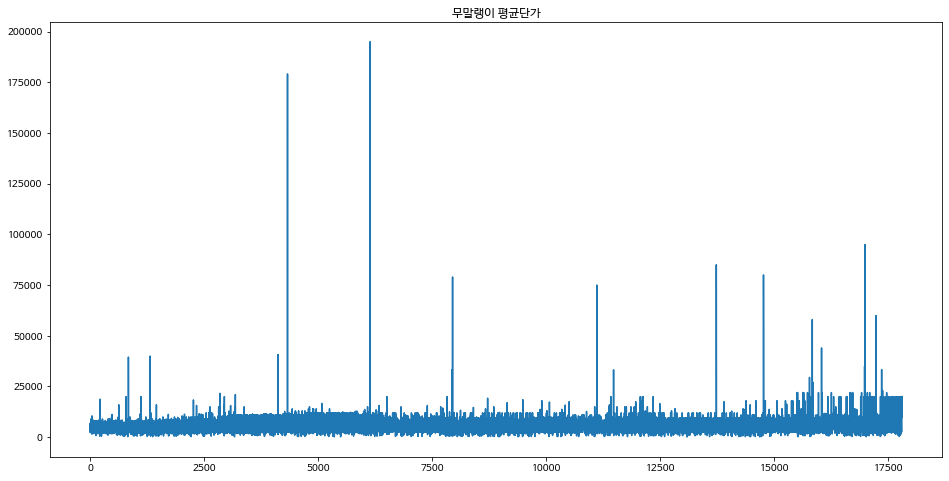

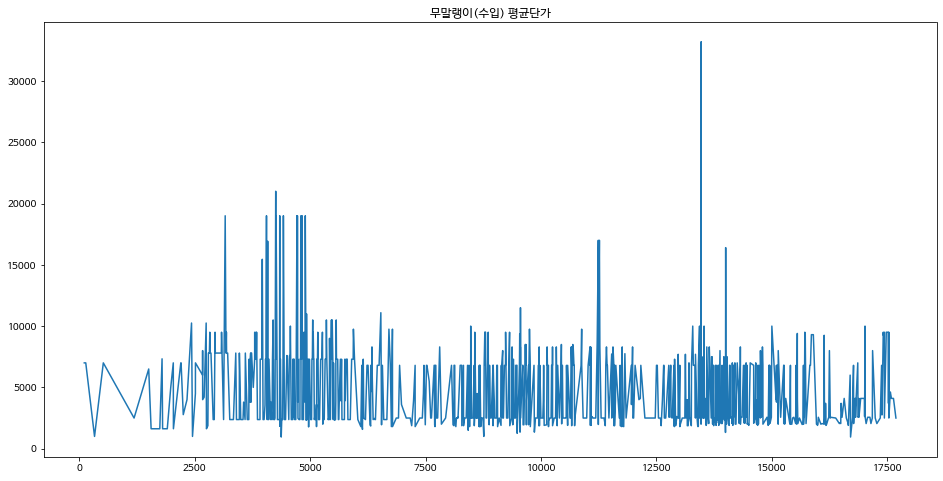

In [ ]:
for i in rab_lst2 :
    df5[df5.KIND_NM == i]['mean_price'].plot(figsize=(16,8), title = f'{i} 평균단가')
    plt.show()

#### 일반 무 EDA

##### 일반 무 이상치 제거
- 농넷 사이트 확인 결과 2016 ~ 2020년도까지의 평균단가는 대부분 최대 3000원 내외

In [ ]:
df6 = df4[df4['KIND_NM'].apply(lambda x : x not in rab_lst2)].reset_index(drop=True)
df6.tail(2)

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT,mean_price,count,month,Day
1320646,2020-09-28,인천구월도매,인천농산물,무,고냉지무,kg,상자,.,상,강원도 정선군,20.0,125.0,20000.0,2500.0,2500000.0,1000.0,1,9,28
1320647,2020-09-28,서울강서도매,강서청과,무,기타무,kg,.,2개,.,광주 북구,20.0,42.0,17000.0,840.0,714000.0,850.0,1,9,28


In [ ]:
df6[df6.mean_price > 3000].shape

(6170, 19)

In [ ]:
df6_1 = df6[df6.mean_price <= 3000]
df6_1.head()

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT,mean_price,count,month,Day
0,2016-01-09,부산엄궁도매,부산청과,무,기타무,kg,PE대,.,보통,제주도 서귀포시,20.0,30.0,6000.0,600.0,180000.0,300.0,1,1,9
1,2016-01-09,부산엄궁도매,부산청과,무,기타무,kg,PE대,.,보통,제주도 서귀포시,20.0,30.0,6000.0,600.0,180000.0,300.0,1,1,9
2,2016-01-09,부산엄궁도매,부산청과,무,기타무,kg,PE대,.,보통,제주도 서귀포시,20.0,20.0,6000.0,400.0,120000.0,300.0,1,1,9
3,2016-01-09,부산엄궁도매,부산청과,무,기타무,kg,PE대,.,보통,제주도 서귀포시,20.0,20.0,6000.0,400.0,120000.0,300.0,1,1,9
4,2016-01-09,부산엄궁도매,부산청과,무,기타무,kg,PE대,.,보통,제주도 서귀포시,20.0,10.0,6000.0,200.0,60000.0,300.0,1,1,9


In [ ]:
rad_lst

['기타무', '건무(수입)', '무말랭이', '저장무', '세척무', ..., '가을무', '무말랭이(수입)', '자색무', '갯무', '무(수입)']
Length: 20
Categories (1900, object): ['3년근', '4년근', '5년근', '6년근', ..., '히다찌레드', '히로사끼', '히카마', '힘노시들레스']

In [ ]:
rad_lst3 = df6_1.KIND_NM.value_counts()[:15].index
rad_lst3

CategoricalIndex(['기타무', '봄무', '저장무', '여름무', '다발무', '고냉지무', '가을무', '무', '세척무',
                  '달랑무', '무솎음', '월동무', '소궁기무', '단무지무', '건무(수입)'],
                 categories=['3년근', '4년근', '5년근', '6년근', 'OBIR', '가나메', '가나자두', '가납암', ...], ordered=False, dtype='category')

In [ ]:
for pum in rad_lst3 : 
    a = df6_1[df6_1.KIND_NM == pum].groupby('SALEDATE')['mean_price'].mean()
    fig = px.line(a, x = a.index, y = a.values, title = f'{pum} 일별 평균단가')
    fig.update_yaxes(tickformat=',')
    fig.show()